<a href="https://colab.research.google.com/github/saravan2/Learning_Python/blob/master/Section_4_Notebook_Student_Version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Section 4 Notebook
In this notebook, we will be modeling word frequency data. We will explore how the continuous distributions we have learned about can be applied to model data. Along the way, we will learn how to graph data in Python and use the Python scientific computing library `scipy`.

**Learning Goals:**
1. Model data with continuous distributions
2. Learn some basic plotting skills using `matplotlib`
3. Learn the function of random seeds


# Word Frequency Data - What's the relationship between rank and frequency?
**Problem:** You have word frequency data from all 65,000 ebooks on [Project Gutenberg](https://www.gutenberg.org/). Word frequency is a simple count of how often a word appears in the corpus, and rank is the position a word takes in a sorted list by frequency. We are trying to find the interesting relationship between word rank and frequency.

If you remember `pandas` from the last notebook, we are using dataframes below to visualize the top 10 words by rank and their frequency counts.

In [ ]:
top_words = ["the", "of", "and", "to", "in", "i", "that", "was", "his", "he"]
data = {}
data['Rank'] = range(1, 11)
data['Count (billion)'] = [56271872, 33950064, 29944184, 25956096, 17420636, 11764797, 11073318, 10078245, 8799755, 8397205]
import pandas as pd
words_df = pd.DataFrame(data, index=top_words)
words_df

,Rank,Count (billion)
the,1,56271872
of,2,33950064
and,3,29944184
to,4,25956096
in,5,17420636
i,6,11764797
that,7,11073318
was,8,10078245
his,9,8799755
he,10,8397205


We've also gone ahead and plotted the frequencies for approximately the top 1000 words using `matplotlib`, a Python plotting library. We pass the [`plot`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html) function the list of word counts, label our axes, and title our graph. 

In [ ]:
data_wordcounts = [56271872,33950064,29944184,25956096,17420636,11764797,11073318,10078245,8799755,8397205,8058110,7725512,7557477,7097981,7037543,6139336,6048903,5741803,5662527,5202501,5113263,5091841,5061050,4580906,4346500,4228287,4108111,4015425,3971997,3894211,3703342,3415846,3340398,3323884,3277699,3224178,3027134,2832569,2820265,2802481,2641417,2637136,2509917,2491655,2472663,2400858,2357654,2320022,2241145,1980046,1961200,1951102,1899787,1875351,1792712,1703963,1680164,1665366,1658553,1605908,1602329,1573117,1571110,1533530,1508779,1498473,1476767,1462382,1449681,1424595,1414687,1400642,1373270,1318367,1317723,1280625,1273589,1255636,1210074,1192154,1188501,1185720,1171742,1136757,1135294,1120163,1117089,1108116,1093366,1090510,1084286,1075612,1056659,1021822,989808,978575,978196,974419,966602,923053,922130,899673,889691,887917,883846,882331,881975,878621,873144,873007,863478,860027,829823,825485,819684,816536,807600,799596,792925,792220,791686,788124,787455,770603,761957,758856,750750,748992,745230,744168,740270,729829,715780,704444,701741,690186,689376,680833,674623,673810,671168,656486,654512,648227,647788,640067,621773,613918,610168,608042,591821,588615,570877,569459,567559,564674,559207,554003,552668,547420,545832,544251,541692,536737,534154,533985,531797,526137,520922,517564,517557,512481,502146,501669,498040,496496,495834,495443,495189,484878,484599,479849,479034,475277,470313,467157,466338,465587,461472,458312,456267,447884,447491,445602,435059,433393,432637,432491,432016,431120,430389,429972,428871,427021,426104,424696,424320,422407,420788,420044,419315,418862,416463,415673,415355,413499,413101,405810,398727,390988,387790,387549,385303,385081,384156,382266,380328,373898,373813,371831,369761,369036,366719,366630,359970,355857,355656,355467,354212,352828,351253,350537,349925,349691,349685,344377,344141,342388,337544,337367,335210,334332,333883,330567,328630,328324,326524,326391,326386,326243,325793,325791,325719,325327,324509,322870,322643,322465,318937,316490,315642,313167,311818,309653,308025,307506,307223,304955,304735,304489,304240,301283,298191,296798,296795,295916,295745,295078,293866,293593,291647,291427,289997,289304,287876,286847,284431,281965,279864,279821,278870,278365,277682,277227,275990,275607,275221,273746,272173,271641,271588,270503,269414,268542,267878,266672,265947,265138,264662,264606,263613,263585,262689,262571,260746,260596,259916,257964,255885,255789,255212,254373,252812,251252,251163,249677,249533,249063,247480,246792,246251,244426,244138,243712,242753,242269,242201,242178,242099,241091,240652,240280,240009,239735,239025,238734,238281,237964,237481,235474,235012,234544,233771,233197,233158,230819,230485,230401,230300,229940,229913,226953,226661,226391,226216,226205,224811,224569,224326,224049,222546,222315,222264,220598,218623,218510,218372,218118,217840,216356,215147,214339,213257,213124,213072,212548,212369,211722,211668,211299,211043,210031,209099,208344,208199,206740,206329,206216,205687,205653,204955,204686,203956,203331,202041,201451,200224,200145,199969,199658,199560,198566,198498,198187,198128,196739,196729,196458,196252,195905,195594,194903,194298,192763,192719,192229,191272,191148,190649,190563,188915,188316,186609,186256,186136,185862,184612,184074,184068,183059,182978,181866,180998,180061,179739,179347,178877,178452,178084,178001,177232,176728,176635,176467,176320,175980,175520,174236,173897,173544,172990,172901,172692,172467,171690,171309,170962,170695,170143,169913,169470,169086,168723,168713,168545,168408,167805,166395,165752,164850,164703,164326,164147,163819,163514,163341,163269,162869,162687,162605,162328,162154,162105,161953,161549,160626,160547,159794,158664,158344,158204,158200,157578,157416,157210,156851,156616,155743,155480,155472,154977,154840,154582,154536,154457,154261,154046,154001,153940,153830,153829,153299,152972,152889,152625,151661,151651,151612,151108,151043,150281,149696,149690,149601,149323,148795,148744,148124,147435,147401,146483,146062,145998,145980,145817,145606,145490,145440,145393,145244,145131,144925,144688,144022,143658,143625,142952,141958,141745,141597,141588,141517,141402,141246,140679,140667,140608,139711,139167,138288,138228,137871,136616,136507,136296,136265,135902,135512,135386,134689,134351,134257,134075,134048,133975,133771,133663,133159,133084,133030,132785,132560,132368,132288,132096,132045,131617,131509,131397,130867,130590,130394,130376,130255,130079,129644,129586,129473,129411,129325,129276,129116,129075,129046,128067,128053,127758,127468,127167,126799,126761,126469,126431,125885,125830,125827,125401,125006,124634,123820,123703,123421,123182,122264,122201,121603,121276,121207,120739,120733,120733,120590,120186,120145,119807,119753,119666,119506,119114,118860,118852,118834,118754,118641,118443,118250,118114,117921,117386,117251,116955,116586,116568,116467,116402,115905,115788,115195,115006,114054,113807,113611,113578,113357,113352,113104,112921,112889,112447,112285,112125,112044,111849,111678,111194,111114,110932,110898,110834,110754,110549,110500,110314,110296,110250,110061,109894,109837,109662,109449,109354,109330,109160,108983,108781,108701,108633,108580,108544,108419,108346,108299,108140,108097,108072,108034,107787,107496,107475,107414,107167,107012,106996,106992,106981,106858,106661,106591,106445,106415,106184,106108,105775,105765,105588,105412,105403,104938,104606,104448,104326,104205,103981,103755,103497,103468,103346,102885,102872,102830,102801,102355,102206,102124,102039,101875,101780,101771,101717,101569,101139,101117,101061,101037,100710,100695,100522,100504,100499,100292,100235,100166,99803.2,99654.4,99561.9,99439.2,99304.7,99220.9,99157.6,99073.7,98994.6,98872.0,98773.9,98758.1,98756.5,98714.6,98705.1,98651.3,98497.8,98232.8,97991.5,97628.3,97567.4,97353.0,97334.0,97093.5,96908.4,96834.8,96735.9,96681.3,96547.6,96465.4,96413.9,96198.0,96182.9,96170.3,96110.1,95979.6,95538.2,95523.9,95398.1,95391.0,95371.2,95303.2,95149.7,95127.6,95049.2,94978.0,94833.3,94706.7,94578.5,94480.4,94379.1,94284.2,94123.6,93912.4,93866.5,93839.6,93675.0,93470.1,93398.1,93384.7,93235.2,92990.7,92800.8,92446.4,92292.1,92260.5,92217.0,92204.3,91995.5,91985.2,91968.6,91937.7,91592.0,91392.6,91305.6,91207.5,91115.7,90923.5,90632.3,90513.7,90412.4,90385.5,90352.3,90319.0,90034.2,89756.5,89723.3,89650.5,89562.7,89480.4,89151.3,89125.2,88381.5,88207.5,88164.0,88133.9,88005.0,87879.2,87876.0,87793.7,87573.0,87538.2,87445.6,87340.4,87300.1,87235.2,87195.6,87073.8,86744.7,86702.0,86560.4,86478.9,86271.6,86256.6,86240.7,86157.7,86132.4,86122.1,86020.0,86008.1,85992.3,85940.9,85875.2,85873.7,85833.3,85777.9,85761.3,85701.2,85694.1,85488.4,85453.6,85391.1,85325.4,85256.6,84796.1,84789.0,84783.5,84750.2,84637.1,84636.3,84584.1,84518.4,84500.2,84365.0,84323.0,84298.5,84153.7,84141.1,84072.2,84004.2,83940.9,83908.5,83853.9,83814.3,83716.2,83639.5,83486.0,83482.1,83421.9,83248.7,83151.4,83147.4,83124.5,83075.4,83039.0,82918.0,82883.2,82839.7,82830.9,82761.3,82725.7,82644.2,82623.7,82566.7,82562.0,82338.9,82223.4,82126.8,82118.1,82035.1,81974.9,81962.3,81899.8,81890.3,81804.1,81671.1,81624.5,81479.7,81457.5,81396.6,81392.7]
plt.plot(data_wordcounts)
plt.title('Word Frequency vs Word Rank')
plt.xlabel('Word Rank')
plt.ylabel('Frequency (in billions)')
plt.show()

## Preliminary: What do you notice between the word rank and frequency from the graph above?


We will be using `scipy.stats`, a statistics module of scipy, which is a useful python library for scientific computing. The module provides us with continuous distributions that we have learned about in class such as `uniform`, `norm`, and `expon`. We will be plotting a histogram of the outcomes of different continuous random variables to find the RV that best explains our data. `rvs` is a function that provides us with random variates (outcomes) from these continous distributions.

## a) Compute 10,000 outcomes from the [uniform](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.uniform.html) distribution $U(0, 1000)$, [normal](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html) distribution $N(0, 250)$, and [exponential](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html) distribution $Exp(\lambda = \frac{1}{200})$. An example for computing outcomes from powerlaw distribution is provided.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import uniform, norm, expon, powerlaw

n = 10000
data_powerlaw = powerlaw.rvs(size=n, a=0.5, loc=0, scale=1000, random_state=0) # powerlaw.pdf(x, a) = a * x**(a-1)
# TODO: Fill the parameters for the uniform, normal, and exponential distributions
data_uniform = uniform.rvs(...)
data_normal = norm.rvs(...)
data_expon = expon.rvs(...)

## b) Plot a histogram of outcomes from the **uniform distribution** with 10 bins and compare the histogram to the word counts data. Hint: Use [`plt.hist`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html).

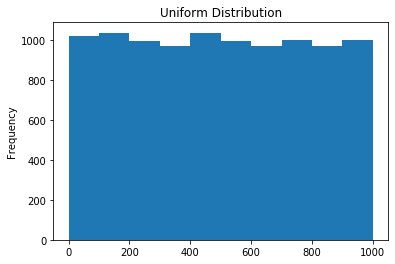

In [ ]:
# TODO: Fill in the parameters to the hist function
plt.hist(...)
plt.ylabel('Frequency')
plt.title('Uniform Distribution')
plt.show()

## c) Plot a histogram of outcomes from the **normal** distribution with 100 bins.

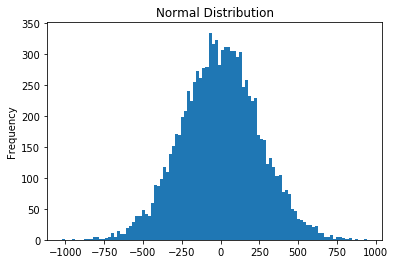

In [ ]:
# TODO: Fill in the parameters to the hist function
plt.hist(...)
plt.ylabel('Frequency')
plt.title('Normal Distribution')
plt.show()

## d) Plot a histogram of outcomes from the **exponential** distribution with 100 bins.

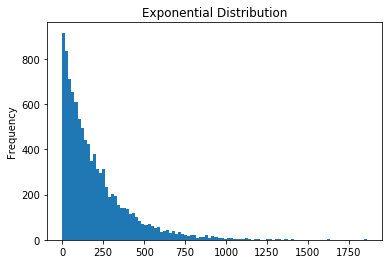

In [ ]:
# TODO: Fill in the parameters to the hist function
plt.hist(...)
plt.ylabel('Frequency')
plt.title('Exponential Distribution')
plt.show()

## e) Discuss: Which of these continuous distributions do you think models the relationship between rank and word frequency the best and why?

## Power Law Distribution
We find that the frequency of each word is approximately inversely proportional to how frequent the word is. The power law also applies here as the frequency of a word varies as the power of the rank, and the most frequent word will occur twice as much as the second most frequent word. 
$$f(r) = \frac{1}{r^a}, \text{r is word rank, f is frequency} $$

Zipf's Law, named after the linguist who discovered this phenomena, essentially states that a few words are used with very high frequency, whereas the majority of words in the dictionary are used sparingly. You can think of how often the word 'the' is used in comparison to the word 'giraffe'. 


## f) Plot a histogram of outcomes from the **Power-law** distribution with 100 bins.

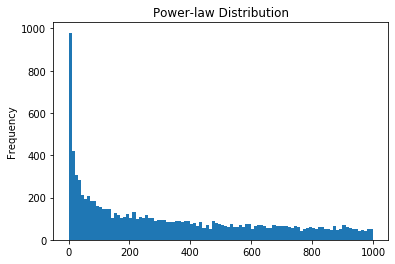

In [ ]:
# TODO: Fill in the parameters to the hist function
plt.hist(...)
plt.ylabel('Frequency')
plt.title('Power-law Distribution')
plt.show()

## g) Bonus: What does the variable `random_state` do when we drew samples from the uniform distribution. What happens when you vary this random seed?